# Метрики качества бинарной классификации

## Теоретическая часть

__Вспомнить из лекций:__
* Как вычисляются следующие метрики качества: **точность, полнота, F-мера, LogLoss, AUC-ROC, AUC-RPC**?

In [345]:
# Accuracy
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


def accuracy(y_true, y_pred):
    """
    Calculate accuracy classification score.
    """
    return np.mean(y_true == y_pred)


# Precision
def precision(y_true, y_pred):
    """
    Calculate precision classification score.
    """
    true_positives = np.sum(y_true * y_pred)
    predicted_positives = np.sum(y_pred)
    return true_positives / predicted_positives


# Recall
def recall(y_true, y_pred):
    """
    Calculate recall classification score.
    """
    true_positives = np.sum(y_true * y_pred)
    possible_positives = np.sum(y_true)
    return true_positives / possible_positives


# F-score

def f_score(y_true, y_pred):
    """
    Calculate F-score classification score.
    """
    precision_ = precision(y_true, y_pred)
    recall_ = recall(y_true, y_pred)
    if precision_ + recall_ == 0:
        return 0
    return 2 * (precision_ * recall_) / (precision_ + recall_)


# log loss
def log_loss(y_true, y_pred):
    """
    Calculate log loss classification score.
    """
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# AUC-RPC
def rpc_auc_score(y_true, y_pred):
    """
    Calculate rpc_auc_score classification score.
    """
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Большинство алгоритмов бинарной классификации работают следующим образом: они предсказывают для объекта  $x$ вещественное число $b(x)$, а затем сравнивают его с порогом $T$: 
- если $b(x) < T$, то предсказывается класс -1, 
- иначе предсказывается класс +1. 

Это можно записать в терминах функции **sign** (знак):
$$a(x) = sign(b(x)-T)$$

Метрики качества бинарной классификации можно разделить на две группы: 

оценивают 
- бинарные предсказания $a(x)$ (класс -1 и +1), 
- вещественные предсказания $b(x)$. 

Некоторые метрики последней группы варьируют порог, и оценивают качество бинарных предсказаний при различных порогах. Это полезно, чтобы "отделить" качество работы алгоритма от качества выбора конкретного порога. 

### Вопрос: 
какие из рассмотренных в лекциях метрик относятся к каждой группе?


### Ответ:

### Задача 1
Вычислить (вручную) **accuracy, точность, полноту** и  **F-меру** для следующих векторов предсказаний и правильных ответов:

|                               |    |    |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |



### Решение:

### Задача 2
Рассмотрим алгоритм вида $$a(x) = sign(b(x)-T).$$ Пусть для любого объекта $x$ выполнено $-10 < b(x) < 10$. Какова будет точность и полнота алгоритма, если положить $T=-15$? $T=15$? 


### Решение:

In [347]:
def accuracy(y_true, y_pred):
    """
    Возвращает количество правильных предсказаний из общего количества объектов.
    """
    return np.sum(y_true == y_pred) / len(y_true)


def precision(y_true, y_pred):
    """
    Возвращает количество правильных предсказаний из количества предсказаний.
    """
    return np.sum(y_true == y_pred) / np.sum(y_pred == 1)

### Задача 3

Найти (вручную) точки, необходимые для пострения ROC-кривой для следующих векторов предсказаний и правильных ответов:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| Предсказание $b(x)$       | 1  | 15 | -1 | 7  | 3  | -8 | -5 |

__Указание:__

Следует сначала отсортировать объекты по возрастанию вещественных предсказаний $b(x)$. 

### Решение:

In [348]:
y_true = np.array([-1, 1, 1, -1, 1, -1, -1])
y_pred = np.array([1, 15, -1, 7, 3, -8, -5])
y_pred = y_pred[np.argsort(y_pred)]


# Create a function for the ROC curve


def roc_curve(y_true, y_pred):
    """
    Возвращает два вектора:
    - первый вектор содержит вероятности правильного предсказания для каждого объекта в порядке убывания вещественных предсказаний $b(x)$;
    - второй вектор содержит вероятности правильного предсказания для каждого объекта в порядке убывания вещественных предсказаний $b(x)$;
    """
    y_pred = y_pred[np.argsort(y_pred)]
    y_true = y_true[np.argsort(y_pred)]
    y_true = y_true[::-1]
    y_pred = y_pred[::-1]
    tpr = []
    fpr = []
    for i in range(len(y_pred)):
        tpr.append(np.sum(y_true[:i + 1] == 1))
        fpr.append(np.sum(y_true[:i + 1] == -1))
    return np.array(fpr), np.array(tpr)


fpr, tpr = roc_curve(y_true, y_pred)

print(fpr)
print(tpr)

[1 2 2 3 3 3 4]
[0 0 1 1 2 3 3]


### Задача 4

Какое значение AUC-ROC будет у алгоритма $b(x)$, который на каждом объекте возвращает случайное вещественное число из отрезка [-2, 2] (равномерное распределение)? 

У алгоритма, который для всех объектов класса -1 возвращает отрицательное число, а для всех объектов класса +1 - положительное число?


### Решение:

In [349]:
# What is the AUC-ROC value of the algorithm , which on each object returns a random real number from the interval [-2, 2] (uniform distribution)?


def roc_curve_random(y_true, y_pred):
    """
    Возвращает два вектора:
    - первый вектор содержит вероятности правильного предсказания для каждого объекта в порядке убывания вещественных предсказаний $b(x)$;
    - второй вектор содержит вероятности правильного предсказания для каждого объекта в порядке убывания вещественных предсказаний $b(x)$;
    """
    y_pred = y_pred[np.argsort(y_pred)]
    y_true = y_true[np.argsort(y_pred)]
    y_true = y_true[::-1]
    y_pred = y_pred[::-1]
    tpr = []
    fpr = []
    for i in range(len(y_pred)):
        tpr.append(np.sum(y_true[:i + 1] == 1) / np.sum(y_true == 1))
        fpr.append(np.sum(y_true[:i + 1] == -1) / np.sum(y_true == -1))
    return np.array(fpr), np.array(tpr)

### Задача 5

Пусть для алгоритма $b(x)$ значение AUC-ROC равно 0.2. Каким будет AUC-ROC алгоритма $-b(x)$?


### Решение:

## Практическая часть

Функции для вычисления метрик в **sklearn** 

In [350]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Сгенерируем два бинарных вектора длины 100 (число объектов):

In [351]:
import numpy as np

In [352]:
n = 100
y_true = np.random.randint(2, size=n)
y_pred = np.random.randint(2, size=n)

Вычислим метрики качества бинарных предсказаний для случайных ответов (соответствует алгоритму, не выделяющему никаких закономерностей в данных):

In [353]:
precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

(0.5882352941176471, 0.5172413793103449, 0.5504587155963303)

In [354]:
accuracy_score(y_true, y_pred)

0.51

Все метрики около 0.5 (примерная доля объектов положительного класса в выборке).

Вычислим метрики для случая, когда все ответы правильные:

In [355]:
precision_score(y_true, y_true), recall_score(y_true, y_true), f1_score(y_true, y_true)

(1.0, 1.0, 1.0)

In [356]:
accuracy_score(y_true, y_true)

1.0

Как и ожидается, все метрики равны 1.

Сгенерируем вектор случайных вещественных предсказаний:

In [357]:
b_pred = np.random.rand(n)

Вычислим roc_auc:

In [358]:
roc_auc_score(y_true, b_pred)

0.5270935960591133

Как и ожидается, значение ROC-AUC около 0.5.

### Задание
Реализовать построение ROC-кривой, используя данные задачи 3.

Сопоставить с результатами, полученными при решении задачи 3.

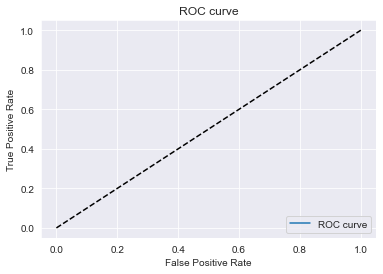

In [360]:
from sklearn.linear_model import Lasso

X, y = make_regression(n_samples=100, n_features=4, n_informative=2, noise=5.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Calculete the ROC curve for a lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
fpr, tpr = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()